# Explore vaccines data

In [50]:
import pandas as pd
from icecream import ic
import glob

import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyplot_themes as themes
import datetime as dt

In [58]:
def set_base_plot_settings(fontsize, if_palette):
    matplotlib.rc('ytick', labelsize=fontsize)
    matplotlib.rc('xtick', labelsize=fontsize)
    themes.theme_minimal(grid=False, ticks=False, fontsize=fontsize)
    a4_dims = (25,15)
    
    if if_palette:
        #          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
        palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
    else:
        palette = 0
    
    fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
    sns.set(font_scale = 2)

    return fig, ax1, palette

def set_late_plot_settings(if_dates):
    ax1.set(xlabel="", ylabel = "")
    ax1.xaxis.get_label().set_fontsize(40)
    ax1.yaxis.get_label().set_fontsize(40)

    ax1.grid(color='darkgrey', linestyle='-', linewidth=0.5, which= "both")
    if if_dates:
        # Define the date format
        ax1.xaxis_date()
        date_form = mdates.DateFormatter("%d-%b")
        ax1.xaxis.set_major_formatter(date_form)

    ax1.set(ylim=(0, None))
    
    #ax1.set_yticklabels(ax1.get_yticks(), size = 35)

    #fig.suptitle("Mentions of 'vaccin*'. 2020 - 2021", size = "40")
    return fig, ax1

def set_late_barplot_settings():
    ax1.set(xlabel="", ylabel = "")
    ax1.xaxis.get_label().set_fontsize(40)
    ax1.yaxis.get_label().set_fontsize(40)
        
    #ax1.set_yticklabels(ax1.get_yticks(), size = 35)

    #fig.suptitle("Mentions of 'vaccin*'. 2020 - 2021", size = "40")
    return fig, ax1

In [51]:
az = pd.read_csv(glob.glob("../hope-keyword-templates/astrazeneca_smoothed*")[0])
p = pd.read_csv(glob.glob("../hope-keyword-templates/pfizer_smoothed*")[0])
m = pd.read_csv(glob.glob("../hope-keyword-templates/moderna_smoothed*")[0])
az["vaccine"] = "AstraZeneca"
p["vaccine"] = "Pfizer"
m["vaccine"] = "Moderna"

ic(len(az))
ic(len(p))
ic(len(m))

az["date"] = pd.to_datetime(az["date"])
p["date"] = pd.to_datetime(p["date"])
m["date"] = pd.to_datetime(m["date"])


df = pd.concat([az,p,m]).drop_duplicates().reset_index(drop=True)

ic| len(az): 3674
ic| len(p): 4620
ic| len(m): 1877


In [52]:
df.head()

,index,created_at,id,text,search_keyword,date,mentioneless_text,text50,dupe50,neg,...,centered_compound,day,entropy,normalized_entropy,centered_entropy,s200_compound,s200_nr_of_tweets,s500_compound,s500_nr_of_tweets,vaccine
0,255,2021-01-01 17:16:15,1.345056e+18,"@hcnordahl Tjahh.. det vil dog stadigvæk, med ...",['astrazeneca'],2021-01-01,"Tjahh.. det vil dog stadigvæk, med det nuvære...","Tjahh.. det vil dog stadigvæk, med det nuvære...",False,0.022,...,0.233109,2021-01-01,0.00000,0.000000,-0.695970,0.095271,12.457585,0.064578,21.937859,AstraZeneca
1,256,2021-01-02 10:48:15,1.345321e+18,For the record de næste 3 vacciner og muligt g...,['astrazeneca'],2021-01-02,For the record de næste 3 vacciner og muligt g...,For the record de næste 3 vacciner og muligt g...,False,0.250,...,-0.845491,2021-01-02,0.00000,0.000000,-0.695970,0.095383,12.482481,0.064490,21.964737,AstraZeneca
2,257,2021-01-03 06:58:32,1.345626e+18,Indiens lægemiddelstyrelse siger god for vacci...,['astrazeneca'],2021-01-03,Indiens lægemiddelstyrelse siger god for vacci...,Indiens lægemiddelstyrelse siger god for vacci...,False,0.000,...,0.479709,2021-01-03,1.94591,0.421624,-0.274346,0.095493,12.507743,0.064402,21.991635,AstraZeneca
3,258,2021-01-03 07:20:48,1.345631e+18,Den enes død er den andres brød 🤮 4 Reasons to...,['astrazeneca'],2021-01-03,Den enes død er den andres brød 4 Reasons to ...,Den enes død er den andres brød 4 Reasons to ...,False,0.260,...,-0.643291,2021-01-03,1.94591,0.421624,-0.274346,0.095600,12.533375,0.064314,22.018551,AstraZeneca
4,259,2021-01-03 10:04:37,1.345672e+18,"Og så bør regeringen tage en snak med Pfizer, ...",['astrazeneca'],2021-01-03,"Og så bør regeringen tage en snak med Pfizer, ...","Og så bør regeringen tage en snak med Pfizer, ...",False,0.000,...,0.021009,2021-01-03,1.94591,0.421624,-0.274346,0.095705,12.559380,0.064226,22.045486,AstraZeneca


## Tweet frequency over time

In [53]:
az.nr_of_tweets.describe()

count    3674.000000
mean       87.244420
std       101.968347
min         1.000000
25%        19.000000
50%        44.000000
75%        94.000000
max       347.000000
Name: nr_of_tweets, dtype: float64

In [54]:
p.nr_of_tweets.describe()

count    4620.000000
mean       44.679221
std        34.732911
min         4.000000
25%        23.000000
50%        34.000000
75%        53.000000
max       181.000000
Name: nr_of_tweets, dtype: float64

In [55]:
m.nr_of_tweets.describe()

count    1877.000000
mean       21.941929
std        18.367585
min         1.000000
25%         9.000000
50%        15.000000
75%        29.000000
max        72.000000
Name: nr_of_tweets, dtype: float64

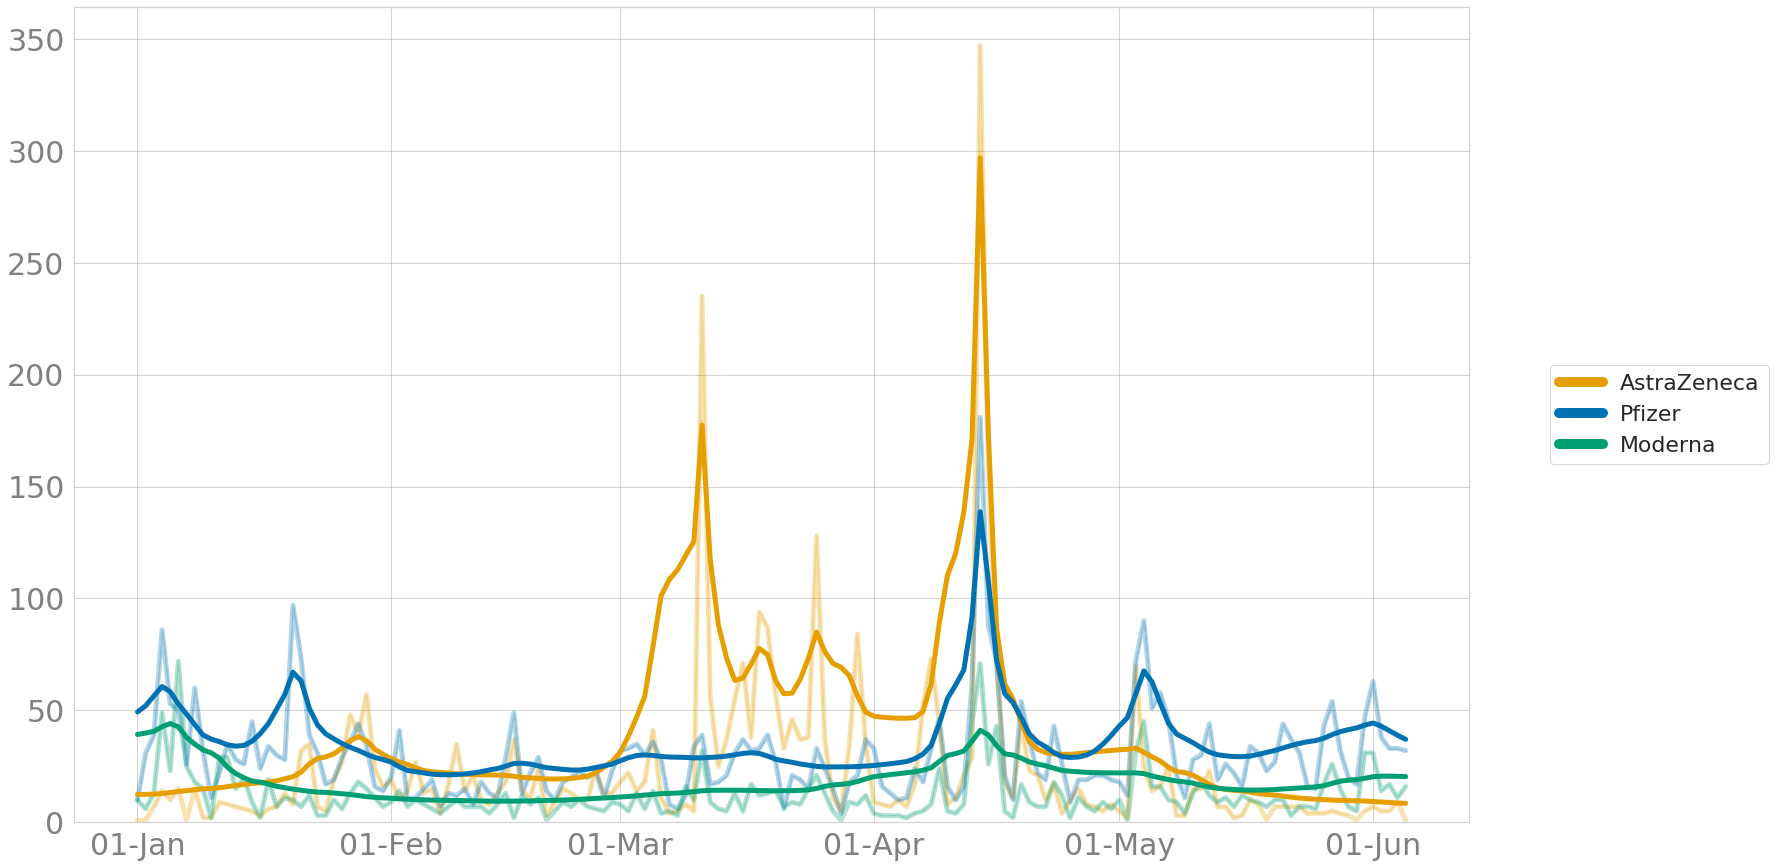

In [76]:
fig, ax1, palette = set_base_plot_settings(fontsize=30, if_palette = True)

ax1 = sns.lineplot(x="date", y="nr_of_tweets", 
                  color = palette[1], 
                   alpha = 0.3,
                     linewidth = 5, data = az)

ax1 = sns.lineplot(x="date", y="nr_of_tweets", 
                  color = palette[5], 
                   alpha = 0.3,
                     linewidth = 5, data = p)

ax1 = sns.lineplot(x="date", y="nr_of_tweets", 
                  color = palette[3], 
                    alpha = 0.3,
                   linewidth = 5, data = m)


ax1 = sns.lineplot(x="date", y="s200_nr_of_tweets", 
                  color = palette[1], 
                   label = "AstraZeneca",
                     linewidth = 5, data = az)

ax1 = sns.lineplot(x="date", y="s200_nr_of_tweets", 
                  color = palette[5], 
                   label = "Pfizer",
                     linewidth = 5, data = p)

ax1 = sns.lineplot(x="date", y="s200_nr_of_tweets", 
                  color = palette[3], 
                   label = "Moderna",
                     linewidth = 5, data = m)

fig, ax1 = set_late_plot_settings(if_dates = True)

leg = plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', facecolor='white')
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(10.0)

plot_name = "fig/az_p_m_mentions.png"
fig.savefig(plot_name, dpi = 100, bbox_inches='tight')

fig.show()

## Check out the correlation of these vaccine mentions

In [81]:
AZ = pd.DataFrame(az["date"], az["nr_of_tweets"]).reset_index().rename(columns={"nr_of_tweets":"AstraZeneca"})
P = pd.DataFrame(p["date"], p["nr_of_tweets"]).reset_index().rename(columns={"nr_of_tweets":"Pfizer"})

co_df = pd.merge(AZ,P).drop_duplicates()

/home/commando/maris/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


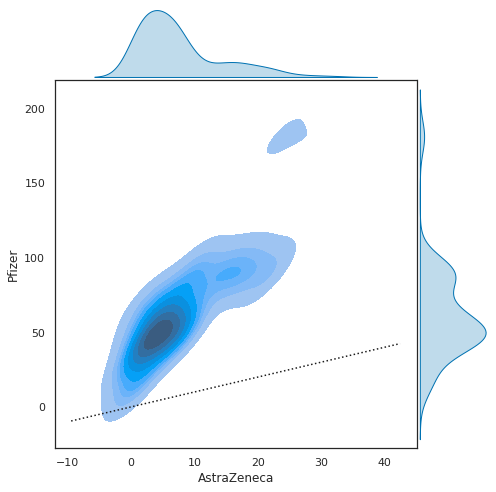

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import show
sns.set(style="white")

palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

g = sns.jointplot(co_df["AstraZeneca"], co_df["Pfizer"], 
                  kind="kde", color = palette[5],
                  height=7, space=0,
                  fill=True)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')

plot_name = "fig/astrazeneca_against_pfizer.png"
#fig.savefig(plot_name)

show()

# Sentiment Analysis

In [84]:
df["date"] = pd.to_datetime(df["date"])

/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


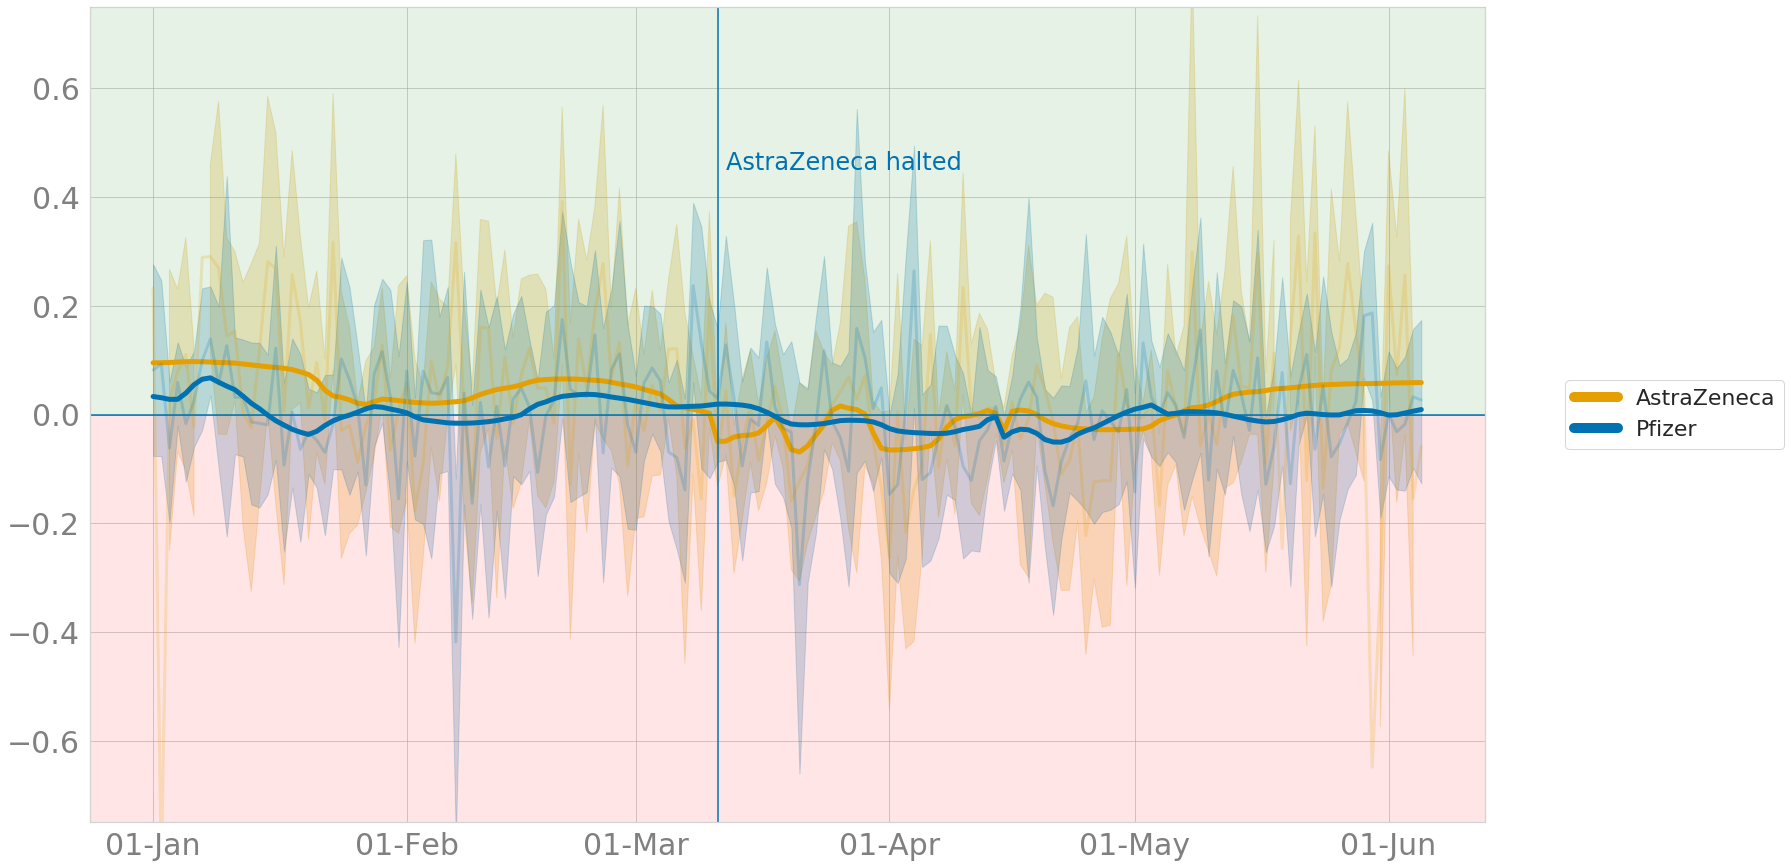

In [85]:
fig, ax1, palette = set_base_plot_settings(fontsize=30, if_palette = True)

ax1 = sns.lineplot(x="date", y="centered_compound", 
                   color = palette[1], alpha = 0.2,
                     linewidth = 3, data = az)
ax1 = sns.lineplot(x="date", y="s200_compound", 
                   label="AstraZeneca", 
                   color = palette[1],
                     linewidth = 5, data = az)

ax1 = sns.lineplot(x="date", y="centered_compound", 
                   color = palette[5], alpha = 0.2,
                     linewidth = 3, data = p)
ax1 = sns.lineplot(x="date", y="s200_compound", 
                   label="Pfizer", color = palette[5],
                     linewidth = 5, data = p)

fig, ax1 = set_late_plot_settings(if_dates = True)

plt.axhline(0, color=palette[5])

#plt.axvline(dt.datetime(2020, 12, 27), color=palette[5])
#plt.text(x = dt.datetime(2020, 12, 28), # x-coordinate position of data label, adjusted to be 3 right of the data point
# y = 0.45,#clean_df[clean_df["date"] == "2020-12-21"]["compound_7day_ave"].reset_index(drop=True)[0], # y-coordinate position of data label, to take max height 
# s = 'First vaccinations', # data label
# color = palette[5])

plt.axvline(dt.datetime(2021, 3, 11), color=palette[5])
plt.text(x = dt.datetime(2021, 3, 12), # x-coordinate position of data label, adjusted to be 3 right of the data point
 y = 0.45, #winter_df[winter_df["date"] == "2021-03-11"]["compound"].reset_index(drop=True)[0], # y-coordinate position of data label, to take max height 
 s = 'AstraZeneca halted', # data label
 color = palette[5])

# Color the bg
plt.axhspan(0, 1, color = "green", facecolor='0.2', alpha=0.1)
plt.axhspan(0, -1, color = "red", facecolor='0.2', alpha=0.1)

ax1.set(ylim=(-0.75, 0.75))

leg = plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', facecolor='white')
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(10.0)

plot_name = "fig/az_p_sentiment_compound.png"
fig.savefig(plot_name, dpi = 100, bbox_inches='tight')

fig.show()